In [1]:
%matplotlib inline
import p3
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Part 1: Basic Image Processing

Let's first read an image in and see how it looks!

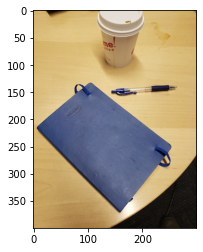

In [2]:
img = p3.imread('img.jpg')
plt.imshow(img)

## Filtering

Let's convolve with Gaussians of two different standard deviations and see what that gives us!

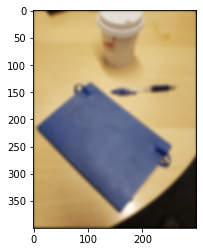

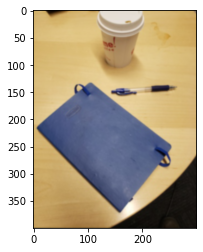

In [3]:
filt1 = p3.gaussian_filter(11,3)
filt2 = p3.gaussian_filter(11,1)
### NOTE: scipy.signal.convolve expects the filter and input to have the same dimensions.
###       To broadcast the filter over all inputs channels, we need to add an extra dimension to the filter.
### NOTE: This should not be needed for grayscale images ;) 
gaussian_filtered1 = signal.convolve(img, filt1[..., None], mode='same')
gaussian_filtered2 = signal.convolve(img, filt2[..., None], mode='same')
plt.figure(); plt.imshow(gaussian_filtered1)
plt.figure(); plt.imshow(gaussian_filtered2)

## Image gradients

Let's now compute image gradients and visualize the gradient magnitude.

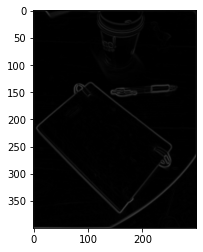

In [4]:
gradmag, gradori = p3.gradient(img)
plt.figure(); plt.imshow(gradmag, cmap = plt.get_cmap('gray'), vmax = 1)

We can threshold the gradient image to get pixels on the boundary. We can even try to find all pixels with gradient orientation between 30 degrees and 90 degrees.

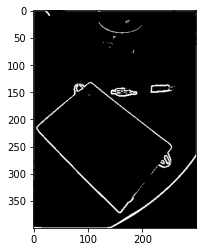

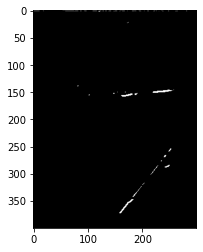

In [5]:
plt.figure(); plt.imshow(gradmag>0.1, cmap=plt.get_cmap('gray'))
plt.figure(); plt.imshow((gradmag>0.1) & (gradori>np.pi/6) & (gradori<np.pi/2), cmap = plt.get_cmap('gray'))

# Part 2: Line detection

Now let's look for lines! We want to find the equation of every line in the image.
Any line is parametrized by $\theta$ and $c$, with the equation of the line given by:
$$x \cos \theta + y \sin \theta + c = 0$$
To detect lines, we will first define the set of possible values of $\theta$ and $c$.

In [6]:
thetas = np.arange(-np.pi-np.pi/40, np.pi+np.pi/40, np.pi/40)
imgdiagonal = np.sqrt(img.shape[0]**2 + img.shape[1]**2)
cs = np.arange(-imgdiagonal, imgdiagonal, 0.5)

Next we will do Hough voting. Let's look at what the votes look like!

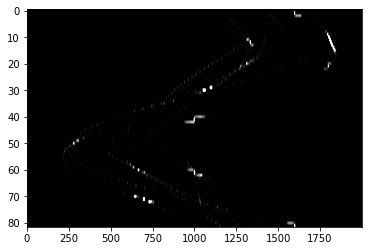

In [7]:
votes = p3.hough_voting(gradmag, gradori, thetas, cs, 0.1, 0.5, np.pi/40)
plt.figure(); plt.imshow(votes, aspect='auto', cmap=plt.get_cmap('gray'), vmax=20)

Next let's find local maxima in this Hough transform, get the equations of the lines and draw the lines!

-1.00x + -0.00y + 299.00 = 0
-0.81x + -0.59y + 396.50 = 0
-0.71x + -0.71y + 156.50 = 0
-0.71x + -0.71y + 404.00 = 0
-0.65x + -0.76y + 167.00 = 0
-0.65x + -0.76y + 407.00 = 0
-0.52x + -0.85y + 415.00 = 0
-0.08x + -1.00y + 155.00 = 0
0.00x + -1.00y + 137.00 = 0
0.00x + -1.00y + 399.00 = 0
0.59x + -0.81y + 51.00 = 0
0.65x + -0.76y + 27.00 = 0
0.65x + -0.76y + 31.00 = 0
1.00x + 0.00y + 0.00 = 0
0.81x + 0.59y + -348.00 = 0
0.08x + 1.00y + -168.00 = 0
-0.08x + 1.00y + 20.50 = 0
-0.71x + 0.71y + -151.00 = 0
-1.00x + -0.00y + 299.00 = 0


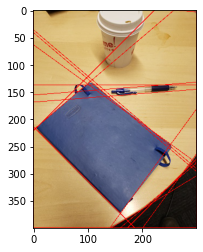

In [8]:

lines = p3.localmax(votes, thetas, cs, 20, 11)
for (theta, c) in lines:
    print('{:.02f}x + {:.02f}y + {:.02f} = 0'.format(np.cos(theta), np.sin(theta), c))


newimg = p3.draw_lines(img, lines, 0.5)
plt.imshow(newimg)


Another example!

-1.00x + -0.00y + 398.00 = 0
-1.00x + -0.08y + 43.00 = 0
-0.08x + -1.00y + 38.00 = 0
0.00x + -1.00y + 270.00 = 0
0.08x + -1.00y + 23.00 = 0
0.45x + -0.89y + 10.00 = 0
1.00x + -0.08y + -182.50 = 0
1.00x + 0.00y + -195.00 = 0
1.00x + 0.00y + 0.00 = 0
1.00x + 0.08y + -206.00 = 0
0.08x + 1.00y + -196.00 = 0
0.08x + 1.00y + -187.50 = 0
-0.38x + 0.92y + -105.00 = 0
-0.45x + 0.89y + -80.00 = 0
-1.00x + 0.08y + 28.00 = 0
-1.00x + -0.00y + 399.00 = 0


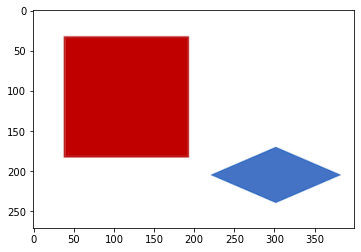

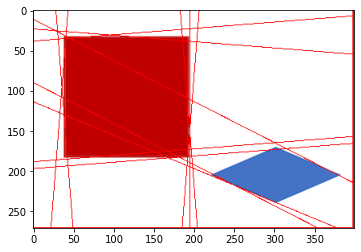

In [9]:
img = p3.imread('img2.png')
plt.figure(); plt.imshow(img)
gradmag, gradori = p3.gradient(img)
votes = p3.hough_voting(gradmag, gradori, thetas, cs, 0.1, 0.5, np.pi/40)
lines = p3.localmax(votes, thetas, cs, 20, 11)
for (theta, c) in lines:
    print('{:.02f}x + {:.02f}y + {:.02f} = 0'.format(np.cos(theta), np.sin(theta), c))



newimg = p3.draw_lines(img, lines, 0.5)
plt.figure();plt.imshow(newimg)
